<a href="https://colab.research.google.com/github/resquilleur/TestWorkNeowoxCC/blob/master/ModelTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/resquilleur/TestWorkNeowoxCC
   ef7768d..cabc9c2  master     -> origin/master
Updating ef7768d..cabc9c2
Fast-forward
 model_pack/model.py | 6 ------
 1 file changed, 6 deletions(-)


# Импорт библиотек

In [54]:
from TestWorkNeowoxCC.model_pack.model import *

import pandas as pd
import numpy as np

from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.optimizers import Adam, RMSprop
# from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv1D, LSTM, Activation, Flatten, Embedding
# from tensorflow.keras.layers import Bidirectional, SpatialDropout1D, GlobalAvgPool1D, MaxPooling1D, Dropout, Conv1DTranspose
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

## Загрузка обработанных данных

x_train, x_test, y_train, y_test - это аугментированные, но не нормализованные наборы

x_train_norm, x_test_norm, y_train_norm, y_test_norm - это аугментированные, нормализованные наборы

In [17]:
%cd TestWorkNeowoxCC

[Errno 2] No such file or directory: 'TestWorkNeowoxCC'
/content/TestWorkNeowoxCC


In [18]:
numpy_data_list = []
list_name = ['x_train', 'x_test', 'y_train', 'y_test', 'x_train_norm', 'x_test_norm', 'y_train_norm', 'y_test_norm']

# функция загрузки
def numpy_load(name):
    with open(f'data/{name}.npy', 'rb') as f:
        data = np.load(f)
    return data

for name in list_name:
    numpy_data_list.append(numpy_load(name))

x_train, x_test, y_train, y_test= numpy_data_list[0], numpy_data_list[1], numpy_data_list[2], numpy_data_list[3]
x_train_norm, x_test_norm, y_train_norm, y_test_norm = numpy_data_list[4], numpy_data_list[5], numpy_data_list[6], numpy_data_list[7]

with open(f'data/vocabulary_len.pickle', 'rb') as f:
        vocab_len_list = np.load(f, allow_pickle=True)

## Создание сети

In [55]:
fabric = ModelFabric()
model_lstm = fabric.create_model('lstm')
model_conv = fabric.create_model('conv')

In [61]:
model_lstm.fit

In [59]:
model_name = ''

In [60]:
model_checkpoint_callback = ModelCheckpoint(
    filepath=f'data/best_weights{model_name}.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

model_lstm64 = model_lstm.make_architecture(vocab_len_list[0], 6, 1, 7, 7)
model_lstm64.compile(optimizer=Adam(learning_rate=0.001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm64.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=model_checkpoint_callback
)

AttributeError: ignored

In [57]:
model_lstm128 = model_lstm.model_lstm.copy().make_architecture(vocab_len_list[0], 6, 1, 7, 7)
model_lstm128.compile(optimizer=Adam(learning_rate=0.001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm128.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=model_checkpoint_callback
)

Epoch 1/30
28/28 [==============================] - 5s 65ms/step - loss: 1.8488 - accuracy: 0.1557 - val_loss: 1.7859 - val_accuracy: 0.1794
Epoch 2/30
28/28 [==============================] - 1s 44ms/step - loss: 1.8135 - accuracy: 0.2032 - val_loss: 1.7825 - val_accuracy: 0.1794
Epoch 3/30
28/28 [==============================] - 1s 40ms/step - loss: 1.8234 - accuracy: 0.2045 - val_loss: 1.7807 - val_accuracy: 0.1794
Epoch 4/30
11/28 [==========>...................] - ETA: 0s - loss: 1.8319 - accuracy: 0.2141

KeyboardInterrupt: ignored

Epoch 1/30
56/56 [==============================] - 8s 51ms/step - loss: 1.7957 - accuracy: 0.2148 - val_loss: 1.7587 - val_accuracy: 0.2870
Epoch 2/30
56/56 [==============================] - 2s 43ms/step - loss: 1.6597 - accuracy: 0.3333 - val_loss: 1.7163 - val_accuracy: 0.2332
Epoch 3/30
56/56 [==============================] - 2s 43ms/step - loss: 1.4442 - accuracy: 0.4527 - val_loss: 1.6857 - val_accuracy: 0.2197
Epoch 4/30
56/56 [==============================] - 2s 44ms/step - loss: 1.2510 - accuracy: 0.5524 - val_loss: 1.5644 - val_accuracy: 0.3408
Epoch 5/30
56/56 [==============================] - 3s 47ms/step - loss: 1.0285 - accuracy: 0.6300 - val_loss: 1.3980 - val_accuracy: 0.4439
Epoch 6/30
56/56 [==============================] - 3s 46ms/step - loss: 0.9025 - accuracy: 0.6717 - val_loss: 1.2799 - val_accuracy: 0.4843
Epoch 7/30
56/56 [==============================] - 2s 43ms/step - loss: 0.7773 - accuracy: 0.7495 - val_loss: 0.8775 - val_accuracy: 0.6502
Epoch 8/30
56

In [ ]:
model2 = Sequential()
model2.add(Embedding(len(vocabulary)+1, 100))
model2.add(SpatialDropout1D(0.7))
model2.add(BatchNormalization())
model2.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model2.add(Dense(y_train.shape[1], activation='softmax'))
model2.compile(optimizer=Adam(learning_rate=0.001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model2.fit(
    x_train,
    y_train,
    batch_size=16,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=model_checkpoint_callback
)

Epoch 1/30
56/56 [==============================] - 5s 47ms/step - loss: 1.8282 - accuracy: 0.2177 - val_loss: 1.7641 - val_accuracy: 0.3857
Epoch 2/30
56/56 [==============================] - 2s 41ms/step - loss: 1.7028 - accuracy: 0.3051 - val_loss: 1.7240 - val_accuracy: 0.4395
Epoch 3/30
56/56 [==============================] - 2s 39ms/step - loss: 1.6129 - accuracy: 0.3932 - val_loss: 1.6610 - val_accuracy: 0.3722
Epoch 4/30
56/56 [==============================] - 2s 39ms/step - loss: 1.4696 - accuracy: 0.4795 - val_loss: 1.5751 - val_accuracy: 0.3677
Epoch 5/30
56/56 [==============================] - 2s 44ms/step - loss: 1.2839 - accuracy: 0.5710 - val_loss: 1.4250 - val_accuracy: 0.4529
Epoch 6/30
56/56 [==============================] - 2s 41ms/step - loss: 1.1072 - accuracy: 0.6329 - val_loss: 1.2479 - val_accuracy: 0.5067
Epoch 7/30
56/56 [==============================] - 2s 41ms/step - loss: 0.9876 - accuracy: 0.6586 - val_loss: 0.9642 - val_accuracy: 0.6278
Epoch 8/30
56

Накопительный график loss по эпохам


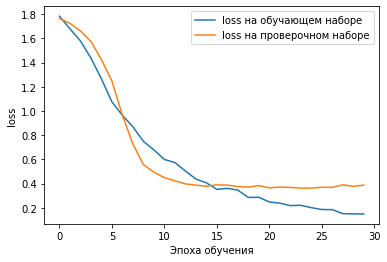

In [ ]:
  import matplotlib.pyplot as plt
  print('Накопительный график loss по эпохам')
  plt.plot(history.history['loss'], 
          label='loss на обучающем наборе')
  plt.plot(history.history['val_loss'], 
          label='loss на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

## Вывод результатов

In [ ]:
# загрузим лучшие веса
model2.load_weights(path+'best_weights.h5')

In [ ]:
# функция вывода результатов получает на вход модель x_test, y_test
def getResults(model, x_test, y_test):
    pred = model.predict(x_test) # получаем предсказание модели
    pred = np.argmax(pred, axis=1) # получаем метку класса с максимальным значением
    result = np.zeros((y_test.shape[1], 2)) # сделаем пустой numpy массив для записи результатов

    # проходимся по всей длине предсказаний
    for i in range(pred.shape[0]):
        # получаем индекс элемента, где у нас 1
        y_true_class_indx = list(y_test[i]).index(max(list(y_test[i])))
        if pred[i] == y_true_class_indx: # если предсказание верно, то увеличиваем счетчик в первом столбце, в строке номера индекса
            result[y_true_class_indx, 0] += 1
        else: # если не верно, то увеличиваем счетчик второго столбца
            result[y_true_class_indx, 1] += 1
    
    # готовим датафрейм с результатами
    result_test_df = pd.DataFrame(result, columns=['true', 'false'])
    result_test_df['percent_true'] = result_test_df['true'] / (result_test_df['true'] + result_test_df['false']) * 100 # считаем процент правильных предсказаний
    result_test_df['tag_name'] = [x[3:] for x in ohe_ytrain.get_feature_names()]
    result_mean = result_test_df['percent_true'].mean()
    print(f'Средний процент правильных предсказаний по всем классам составил: {result_mean}')
    print(result_test_df)

In [ ]:
# результат на изначальном наборе (с 6 классами)
getResults(model2, x_train_pad_seq_not_aug, y_train_not_aug)

Средний процент правильных предсказаний по всем классам составил: 95.2651148348791
    true  false  percent_true          tag_name
0   84.0    1.0     98.823529   tag_do_not_call
1  103.0   19.0     84.426230            tag_no
2   67.0    1.0     98.529412       tag_not_now
3   36.0    0.0    100.000000  tag_what_company
4   47.0    3.0     94.000000        tag_who_is
5  183.0    8.0     95.811518           tag_yes


## Формируем табличку с предсказанием классов для проверочного набора

In [ ]:
x_valid_data = data_valid['message'].values

# x_valid_normal = []

# for frase in x_valid_data:
#     new_frase = ''
#     words = frase.split()
#     for word in words:
#         word = word.replace('!', '').replace(',', '').replace('?', '')
#         new_frase += f' {ma.normal_forms(word)[0]}'
#     x_valid_normal.append(new_frase)   

x_valid = tokenizer.texts_to_sequences(x_valid_data)
x_valid = pad_sequences(x_valid, padding='pre')
valid_pred = model2.predict(x_valid)

valid_df = pd.DataFrame()
valid_df['massege'] = list(x_valid_data)
valid_df['softmax'] = list(valid_pred.round(2))
valid_df['class'] = list(np.argmax(valid_pred, axis=1))

valid_df['class'] = np.array([x[3:] for x in ohe_ytrain.get_feature_names()])[valid_df['class']]
valid_df

,massege,softmax,class
0,зачем это надо,"[0.0, 0.0, 0.0, 0.0, 0.36, 0.63]",tag_yes
1,ну,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",tag_yes
2,какая организация?,"[0.02, 0.33, 0.0, 0.26, 0.01, 0.38]",tag_yes
3,во имя чего?,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",tag_yes
4,вы тут?,"[0.01, 0.08, 0.0, 0.0, 0.0, 0.9]",tag_yes
5,да ну вас!,"[0.01, 0.01, 0.0, 0.0, 0.0, 0.98]",tag_yes
6,"приветствую, а что за организация?","[0.0, 0.03, 0.0, 0.95, 0.01, 0.01]",tag_what_company
7,да хорошо,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",tag_yes
8,с какой радости?,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",tag_yes
9,и что дальше?,"[0.0, 0.03, 0.0, 0.0, 0.01, 0.96]",tag_yes


,massege,softmax,class
0,зачем это надо,"[0.0, 0.0, 0.0, 0.0, 0.15, 0.84]",tag_yes
1,ну,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",tag_yes
2,какая организация?,"[0.0, 0.0, 0.0, 0.03, 0.0, 0.97]",tag_yes
3,во имя чего?,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",tag_yes
4,вы тут?,"[0.0, 0.01, 0.0, 0.0, 0.02, 0.97]",tag_yes
5,да ну вас!,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",tag_yes
6,"приветствую, а что за организация?","[0.0, 0.08, 0.0, 0.67, 0.23, 0.02]",tag_what_company
7,да хорошо,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",tag_yes
8,с какой радости?,"[0.01, 0.02, 0.0, 0.02, 0.01, 0.94]",tag_yes
9,и что дальше?,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",tag_yes


In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 8.2MB 21.4MB/s 


In [ ]:
import pymorphy2
ma = pymorphy2.MorphAnalyzer()


In [ ]:
ma.normal_forms('организаций')

['организация']